# Chapter 8. Dimensionality Reduction
> This chapter focuses on the techniques to overcome the difficulty of high dimensional data. These datasets often cannot be held in memory together and/or demand a huge computational cost. By reducing dimensionality, we can minimize or eliminate these problems often with little/no cost to model performance (or even sometimes improved performance)!

1. Manifold Learning

    - Unfolding a lower dimensional manifold from a higher dimensional space
    - Manifold Hypothesis: "most real-world high-dimensional datasets lie close to a much lower-dimensional manifold".
    - Think of the Swiss Roll example!

2. PCA (Principal Component Analysis)

    - Transforms the higher dimensional data to orthogonal vectors that capture the majority of the variance (the principal components)

    - Side Note: If you do PCA on the covariance of stock returns, the first principal component is the relative weighting of market capitalization (thus the makeup of the S&P 500 ETF)

    - Used for data compression

    - PCA Generation for data too large for memory

        - Incremental PCA
        - Randomized PCA
        - Kernel PCA (kPCA)

3. LLE (Logically Linear Embedding)

    - Nonlinear Dimensionality Reduction
    - "Works by first measuring how each training instance linearly relates to its closest neighbors (hyperparameter) and then looks for a low-dimensional representation of the training set where the local realtionships are best preserved".
    - "Good at unrolling manifolds when there is not too much noise."
    - Does not preserve Large scale relationships

4. Multidimensional Scaling (MDS)

5. Isomap: Preserve geodesic (number of edges in a graph) distances
6. t-Distributed Stochastic Neighbor Embedding (t-SNE): Best to visualize clusters of high dimensional space
7. Linear Discriminant Analysis (LDA): Actually a classifier that can find best hyperplane for projection, which sets up data for another classifier (e.g. SVM)

- Many ML problems will involve thousands or even millions of features per instance.
- Not only all of these features make training extremly slow, but they can also make it much harder for an optimization method to find a good solution.
- This problem is often referred to as the **curse of dimensionality**.
- In real world problem, it is often possible to reduce the number of features considerably.
    - Turning an intractable problem into a tractable one.
- The goal is to remove the maximum number of features while minimizing information loss that relates to a specific task
    - Task example — Classifying MNIST digits.
- Reducing dimensionality does cause some information loss.
- It also makes your pipeline a bit more complex and thus harder to maintain.
- Dimensionality reduction is usually conducted to **speed up training**.
- Dimensionality reduction is also extremly useful for data visualization.
    - Taking it down to 2/3 dimensions for your data set will allow you visualize it in a 2/3D space.
- DataViz is also important to communicate your findings to people who are not data scientists.
    - In Particular, decision makers who will use your results.
- In this chapter we will:
    - Discuss the curse of dimenstionality.
    - Get a sense of what goes on in a high-dimenstional space.
    - Consider the main two approaches to dimensionality reduction:
        - Projection
        - Manifold Learning
    - Go through 3 popular dimensionality reduction techniques:
        - PCA
        - Kernel PCA
        - LLE

## The Curse of Dimensionality

- We are so used to living in three dimensions
    - 4 if you consider time, and a few more if you are a string theorist.
- It turns out that many things behave very differently in high-dimensional spaces.
- If you pick a random point in a unit square, it will have ~0.4% chance of being located at <0.001 from a border.
- But in a 1,000-dimensional hyper-cube the probability is >99.999999%.
    - Most points in a high-dimensional space are very close to the border.
- Same goes to distances betweeen points, If you pick two random points in a lower dimensional space, they will be closer in comparison to picking them from a high-dimensional space.
- **There is just plenty of space in a high-dimensional one!**

Disadvantage
- High-dimensional datasets are at risk of being too sparse.
- High dimensional data restricts the choice of data processing methods.
- The most dimensions a dataset has, the more risk it is to overfit it.

## Main Approaches to Dimensionality Reduction

### Projection

- In most real-world problems, training instances are not spread out uniformly across the dimensions.
    - Many features are almost constant, while others are highly correlated.
- <font color='red'> As a result, all training instances like close to a much-lower dimensional **subspace** of the high-dimensional space.</font>
- Here is an example of that:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/subspace_projection.png" />
</div>

- If we perpenducarly project every training instance into the subspace, we get a new 2D dataset represented as follows:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/2d_projection.png" />
</div>

- However, projection is not always to best approach to dimensionality reduction.
    - In many case the subspace may twist & turn.

### Manifold Learning

- Mathematics Definition, a manifold is a topological space that locally resembles Euclidean space near each point. 
    - A 2D manifold is a 2D shape that can be bent & twisted in a higher-dimensional space.
    - More generally, a d-dimensional manifold is part of an n-dimensional space `(where d < n)`, that locally resembles a d-dimensional hyperplace.
- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie, this is called **Manifold Learning**.
    - It relies on the *manifold assumption*, also called the *manifold hypothesis*.
        - Which holds that most real world high-dimensional datasets lie close to a much lower-dimensional manifold.
            - **This assumption is very often empirically observed**.
- Thought experiment
    - If you were to generate random images on a 28x28 grid, only a very small fraction of them would look like handwritten digits.
    - In other words, the degrees of freedom available to you if you were to create a digit image are very low compared to the degree of freedom you have when you want to create any image you want (random).
    - **These constraints tend to squeeze the dataset into a lower-dimensional manifold**.

---
- An implicit additional assumption is that the task at hand (being regression or classification) would be much easier if conducted on the lower dimensional manifold space.
    - This assumption does not always hold.
    - Examples to follow:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/manifold_classification.png" />
</div>

- <font color='red'> In short, reducing the dimensionality of your dataset will speed up training, but it doesn't guarantee a simpler solution. 
    - It all depends on the dataset and the task at hand. </font>
- Now we will go through some of the most popular dimensionality reduction algorithms.

Linear Dimensionality Reduction Methods
The most common and well known dimensionality reduction methods are the ones that apply linear transformations, like
1. PCA (Principal Component Analysis) : Popularly used for dimensionality reduction in continuous data, PCA rotates and projects data along the direction of increasing variance. The features with the maximum variance are the principal components.
2. Factor Analysis : a technique that is used to reduce a large number of variables into fewer numbers of factors. The values of observed data are expressed as functions of a number of possible causes in order to find which are the most important. The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise.
3. LDA (Linear Discriminant Analysis): projects data in a way that the class separability is maximised. Examples from same class are put closely together by the projection. Examples from different classes are placed far apart by the projection

## PCA

- Principal Component Analysis is by far the most popular dimensionality reduction algorithm.
- First, **It identifies the hyperplane that lies closest to the data**.
- Then, **It projects the data into it**.

### Preserving the Variance

- We want to choose a hyperplace that most preserves tha variance within the data, following is attempted projections for 3 chosen hyperplanes (1D axis):

<div style="text-align:center;">
    <img style="width:66%" src="static/imgs/2D_variance_projection.png" />
</div>

- Reason1: It seems reasonable to select the axis that preserves the maximum amount of variance.
    - As it will most likely lose less information than other projections.
- Reason2: Another way of looking at it is by choosing the solid line axis, we are minimizing the mean squared distance between the original points and their projections into the chosen axis.
    - This is the rather simple idea behind PCA.

### Principle Components

- PCA identifies the axis that accounts for the **largest amount of variance** in the training set.
    - It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.
    - If we're considering a higher-dimensional dataset, PCA would also find a third axis, and a fourth, and a fifth, and so on...
    - As many axes as the number of dimensions in the dataset.
- The ith axis is called the ith **principal component** of the data.
- So how can you find the principal components of a training set?
    - There is a standard matrix vectorization technique called *Singular Value Decomposition (SVD)*
        - It can decompose the training set $X$ into $X=U \Sigma V^T$
        - $V$ contains the unit vectors that define all the principal components that we are looking for:

    $$V=
      \begin{pmatrix}
        \vert & \vert & \dots & \vert \\
        c_1 & c_2 & \dots & c_n \\
        \vert & \vert & \dots & \vert \\
      \end{pmatrix}
    $$

- let's extract the principal components of a dataset using numpy's `svd` implementation:

- Let's start by generating some data:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


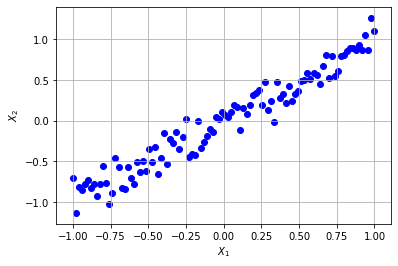

In [17]:
X = np.linspace(start=-1., stop=1., num=100)
y = X + np.random.normal(size=100)/7.
X.shape, y.shape

plt.scatter(X, y, c='blue')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.show()

In [18]:
X = np.concatenate((X[..., None], y[..., None]), axis=1)
X.shape

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(a=X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [19]:
c1, c2

(array([0.70689627, 0.70731723]), array([-0.70731723,  0.70689627]))

- These two 2D points represent the unit vector points (origin at (0,0)) corresponding to the 2 principal components (axes that preserve variance).
- PCA assumes that the dataset is centered around the origin, but scikit-learn implementation takes care of centering the data for you.

### Projecting down to $d$ Dimensions

- Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components.
- Selecting this hyperplane ensures that the projection will preserve as much variance as possible.
- To Project the training set into the hyperplane and obtain a reduced dataset $X_{d-proj}$ of dimensionality $d$:
    - Compute the matrix multiplication of the training set matrix $X$ by the matrix $W_{d}$ 
        - $W_{d}$ is the matrix containing the first $d$ columns of $V$ representing the principal components.

$$X_{d-proj}=XW_d$$

- Let's do it in Python:

In [23]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D.shape

(100, 2)

### Using Scikit-Learn

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
assert np.all(np.abs(pca.components_) == np.abs(W2))

### Explained Variance Ratio

- The ratio indicates the proportion of the dataset's variance lying along each principal component.
- Let's take a look at it for our scikit-learn learner:

In [26]:
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.98620617, 0.01379383]), 1.0)

### Choosing the Right Number of Dimensions

- Choose the number of dimensions that add up to a large portion of the variance that lied within the original dataset.
    - Example: $>=95\%$
- Unless, ofcoures, you are reducing dimensionality to visualize the data.
    - In that case you will want to reduce the data down to 2/3 axis.
- Let's do it in scikit-learn:

In [28]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

1

- Then re-run PCA training using $d$.
- But there is a much better option, that of specifying a float for `n_components` as the ratio of variance we want to preserve.

In [29]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

### `PCA` for Compression 

- After dimensionality reduction, the training set takes much less space.
- It is also possible to decompress the reduced dataset back to $784$ (in the case of MNIST) by applying **the inverse transformation of the PCA projection**.
    - **This won't give you back the original data since 5% of the variance was lost while compressing**.
    - But it will likely be close to the original dataset.
- **The mean squared distance between the original dataset and the decompressed dataset is called the Reconstruction Error**.
- Let's do it with scikit-learn:

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [33]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

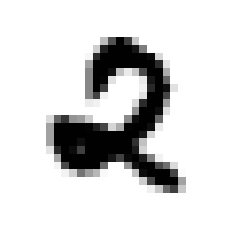

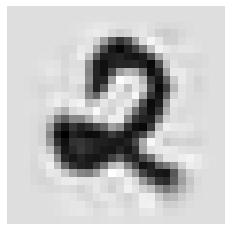

In [37]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

plt.imshow(X_recovered[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

- Following is the equation of the inverse transformation:

$$X_{recovered}=X_{d-proj}W_{d}^{T}$$

### Randomized PCA

- We can use a stochastic algorithm called *Randomized PCA* that **quickly finds** an approximation of the first $d$ principal components.
- Its computational complexity is $O(m \times d^{2})+O(d^3)$ instead of SVD's $O(m \times n^{2})+O(n^3)$.
- So it's dramatically faster then SVD when $d << n$.
- Let's use it with `scikit-learn`:

In [39]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

- One problem with the previous implementations of PCA is that they require the whole training data to fit in memory.
- Fortunately, **incremental PCA** algorithms have been developed.
- They allow us to split the training set in mini-batches and feed them one at a time to the IPCA algorithm.
- This is useful when having large training sets or doing online learning.
- Let's experiment with incremental PCA using scikit-learn:

In [40]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

- We can also mimic normal fitting behavior by using the `memap` class to store our training data:

## Kernel PCA

- Recall that a linear decision boundary in a high-dimensional space corresponds to a non-linear decision boundary in the original low-dimensional space.
- It turns out that the "kernel trick" can also be applied to PCA.
- Making it possible to perform complex non-linear projections for dimensionality reduction.
- It's often **good at preserving clusters of instances after projecting them**.
- Let's use kPCA in scikit-learn:

- First we create a swiss roll:

In [41]:
X, _ = datasets.make_swiss_roll(n_samples=1000, noise=1)
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, n_jobs=-1)
X_reduced = rbf_pca.fit_transform(X)
X_reduced.shape

(1000, 2)

### Selecting a Kernel and Tuning Hyperparameters

- *Note: Use a GPU*
- As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyper-parameter values.
- That said, dimensionality reduction is often a pre-processing step for a supervised learning task.
- So you can use grid search to select the kernel and hyper-parameters that lead to the best performance on the end task.
- The following scikit-learn example create a two step pipeline:
    - First reducing the dimensionality to 2 dimensions using kPCA.
    - Then Applying logistic regression for classification.
- Then we use `GridSearchCV` to find the best **kernel** and **gamma** value for kPCA in order to get the best classification accuracy at the end of the pipeline.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

In [ ]:
# USE GPU
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 5),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train[:1000], y_train[:1000])  # not enough compute for all training all
grid_search.best_params_

- Another approach, entirely unsupervised, is to select the kernel and hyper-parameters that **yield the lowest reconstruction error**.
- Let's visualize the steps we take with kernel-based dimensionality reduction:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/reconstruction_vis.png" />
</div>

- Notice that when we invert our final transformation, we get instance on the infinite feature space and not the original space.
- Since the feature space is infinite, we cannot compute the reconstruction loss. 
- But it's possible to find a point in the original space that map close to the reconstructed point, this point is called the reconstructed **pre-image**.
- Once you have the pre-image, you can measure its squared distance to the original instance.
- In terms of **how to perform the reconstruction**, You can train a supervised learning algorithm to find a mapping between the original dataset and the reduced data.
- scikit-learn can do it for you with the `fit_inverse_transform` hyper-parameter:

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

- You can you grid search to find the hyper-parameters that minimize this error.

## [Random Projections](https://machinelearningmedium.com/2017/07/28/random-projection-in-dimensionality-reduction/)
Random Projections have emerged as a powerful method for dimensionality reduction. Theoretical results indicate that it `preserves distances` quite nicely but empirical results are `sparse`. 

- A higher dimensional data is projected onto a lower-dimensional subspace using a random matrix whose columns have unit length.
    - The original d-dimensional data is projected to a k-dimensional (k << d ) hrough the origin, using a random k∗d matrix R whose columns have unit lengths. It is given by `X(k*N) = R*(k*d)X(d*N)`
- It is often employed in dimensionality reduction in both `noisy and noiseless data` especially image and text data. 
---
Advantages: 
- Accurate enough as it does not introduce a significant distortion in the data. 
- `Computationally less expensive` than the traditional alternatives and yet .
- Not sensitive to impulse noise. So RP is promising alternative to some existing methods in noise reduction (like mean filtering) too.

---
#### The key idea of random mapping arises from Johnson-Lindenstrauss Lemma
If points in vector space are projected onto a randomly selected subspace of suitably high dimensions, then the distances between the points are approximately preserved.

## Linear Discriminant Analysis
### [Linear Discriminant Analysis for classification](https://www.youtube.com/watch?v=azXCzI57Yfc)

Compared with PCA
- PCA reduced dimensions by focusing on the variables with the most variation.
    - This useful for plotting data with a lot of dimensions  onto a simple X/Y plot

- LDA is like PCA, but if focuses on maximizing the seperatiblity among known categories.

---
Assumptions
1. That your data is Gaussian, that each variable is is shaped like a bell curve when plotted.
2. That each attribute has the same variance, that values of each variable vary around the mean by the same amount on average.

---
How to prepare data for LDA
1. Classification Problems.
    
    This might go without saying, but LDA is intended for classification problems where the output variable is categorical. LDA supports both binary and multi-class classification.
    
    
2. Gaussian Distribution. 

    The standard implementation of the model assumes a Gaussian distribution of the input variables. Consider reviewing the univariate distributions of each attribute and using transforms to make them more Gaussian-looking (e.g. log and root for exponential distributions and Box-Cox for skewed distributions).
    
    
3. Remove Outliers. 

    Consider removing outliers from your data. These can skew the basic statistics used to separate classes in LDA such the mean and the standard deviation.


4. Same Variance.

    LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.

---
How LDA creates a new axis:
1. Maximize the distane between means
2. Minimize the variation (which LDA calls "scatter" and is represented by s^2) within each category

### [Feature Reduction](https://chrisalbon.com/machine_learning/feature_engineering/lda_for_dimensionality_reduction/)

**[Do LDA step by step](https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2)**

In [61]:
from sklearn.datasets import load_wine
import pandas.util.testing as tm
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [62]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

X.shape, wine.target_names

df = X.join(pd.Series(y, name='class'))
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [63]:
# Step1: Within Class Scatter Matrix

class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means


within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    print(c, rows.shape)
    rows = rows.drop(['class'], axis=1)

    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        s += (x - mc).dot((x - mc).T) 
        
    
    within_class_scatter_matrix += s

class_0 (59, 14)
class_1 (71, 14)
class_2 (48, 14)


In [64]:
# Step2: Between Class Scatter Matrix
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:   
    n = len(df.loc[df['class'] == c].index)
    print(c, n)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

class_0 59
class_1 71
class_2 48


In [70]:
# Step3: obtain the linear discriminants.

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix)\
                                            .dot(between_class_scatter_matrix))

The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. Thus, we sort the eigenvalues from highest to lowest and select the first k eigenvectors. In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

In [67]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

# percent
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

9.081739435042463
4.1284690456394895
8.541143958056148e-16
8.541143958056148e-16
5.496442203571366e-16
4.1152096071896675e-16
4.1152096071896675e-16
3.573345264159707e-16
1.7925080964302876e-16
1.766013718358249e-16
1.766013718358249e-16
2.299563729068776e-17
0.0
Explained Variance
Eigenvector 0: 0.6874788878860778
Eigenvector 1: 0.3125211121139221
Eigenvector 2: 6.465563333497994e-17
Eigenvector 3: 6.465563333497994e-17
Eigenvector 4: 4.1607535654029446e-17
Eigenvector 5: 3.115173854528923e-17
Eigenvector 6: 3.115173854528923e-17
Eigenvector 7: 2.7049877898484456e-17
Eigenvector 8: 1.3569112849744765e-17
Eigenvector 9: 1.3368552971293316e-17
Eigenvector 10: 1.3368552971293316e-17
Eigenvector 11: 1.7407474926921553e-18
Eigenvector 12: 0.0


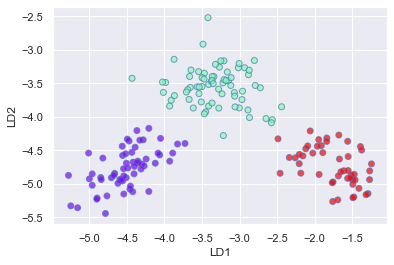

In [71]:
# Step4: we create a matrix W with the first two eigenvectors.

w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

# Then, we save the dot product of X and W into a new matrix Y.

X_lda = np.array(X.dot(w_matrix))

le = LabelEncoder()
y = le.fit_transform(df['class'])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

**Using sklearn LDA library**

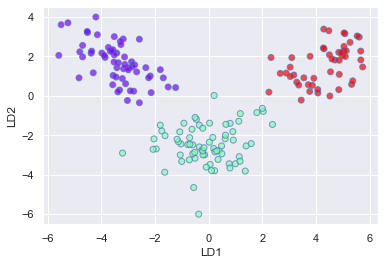

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)


lda.explained_variance_ratio_

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

**Compared to PCA** 

As we can see, PCA selected the components which would result in the highest spread (retain the most information) and not necessarily the ones which maximize the separation between classes.

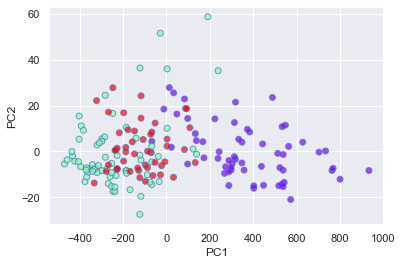

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

**Ceate a model to classify the using the LDA components as features** 

As we can see, the Decision Tree classifier correctly classified everything in the test set.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]])

# Non-linear Dimensionality Reduction Methods
Non-linear transformation methods or manifold learning methods are used when the data doesn’t lie on a linear subspace. It is based on the manifold hypothesis which says that in a high dimensional structure, most relevant information is concentrated in small number of low dimensional manifolds. If a linear subspace is a flat sheet of paper, then a rolled up sheet of paper is a simple example of a nonlinear manifold. Informally, this is called a Swiss roll, a canonical problem in the field of non-linear dimensionality reduction. Some popular manifold learning methods are,
1. Multi-dimensional scaling (MDS) : A technique used for analyzing similarity or dissimilarity of data as distances in a geometric spaces. Projects data to a lower dimension such that data points that are close to each other (in terms if Euclidean distance) in the higher dimension are close in the lower dimension as well.
2. Isometric Feature Mapping (Isomap) : Projects data to a lower dimension while preserving the geodesic distance (rather than Euclidean distance as in MDS). Geodesic distance is the shortest distance between two points on a curve.
L3. ocally Linear Embedding (LLE): Recovers global non-linear structure from linear fits. Each local patch of the manifold can be written as a linear, weighted sum of its neighbours given enough data.
4. Hessian Eigenmapping (HLLE): Projects data to a lower dimension while preserving the local neighbourhood like LLE but uses the Hessian operator to better achieve this result and hence the name.
Spectral Embedding (Laplacian Eigenmaps): Uses spectral techniques to perform dimensionality reduction by mapping nearby inputs to nearby outputs. It preserves locality rather than local linearity
5. t-distributed Stochastic Neighbor Embedding (t-SNE): Computes the probability that pairs of data points in the high-dimensional space are related and then chooses a low-dimensional embedding which produce a similar distribution.

## LLE

Key ideas:
- Other methods of dimensionality reduction fail to be successful on non linear space.
- LLE takes advantage of the local geometry and pieces it together to preserve the global geometry on a lower dimensional space.

---
Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

- Locally Linear Embedding is a powerful non-linear dimensionality reduction technique.
- It's a manifold learning technique that doesn't rely on projections like the previous algorithms do.
- LLE works by first measuring how each instance relates to its neighbors
- Then it looks for low-dimensional representation of the training set where each local relationship is best preserved.
- Let's use it with scikit-learn:

---
[How does it all work?](https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9)

LLE first finds the k-nearest neighbors of the points. Then, it approximates each data vector as a weighted linear combination of its k-nearest neighbors. Finally, it computes the weights that best reconstruct the vectors from its neighbors, then produce the low-dimensional vectors best reconstructed by these weights.

1. Computes the K nearest neighbors
    - One advantage of the LLE algorithm is that there is only one parameter to tune, which is the value of K, or the number of nearest neighbours to consider as part of a cluster. 
    - If K is chosen to be too small or too large, it will not be able to accomodate the geometry of the original data. Here, for each data point that we have we compute the K nearest neighbours.

2. Compute a set weights that can be used reconstruct a point
    - We do a weighted aggregation of the neighbours of each point to construct a new point
    - Weights can not be 0
    - Rows of the weight matrix must equal to 1
    - Minimize the cost function

3. Compute a embedding vector of Y with the weights that wer previously defined in step2
    - Minimize the cost function below
    - Weights are fixed also the original point is not in this step

---
Advantages:

1. Consideration of the non-linearity of the structure
LLE goes beyond density modeling techniques such as local PCA or mixtures of factor analyzers. 


2. Better computational time

    Since LLE tends to accumulate sparse matrices, it is more efficient than the other algorithms in terms of computational space and time.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

- The resulting 2D dataset is shown as follows:

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/swiss_unroll.png" />
</div>

- LLE did a pretty good job at modeling the manifold.
- Here is how LLE works:
    1. For each training instance $x^{(i)}$, the algorithm identifies its $k$ closest neighbors.
    2. The Algorithm tries to reconstruct $x^{(i)}$ as a linear function of these neighbors.
    3. It finds $w_{i,j}$ such that it minimizes $J(x^{(i)}, \sum_{j=1}^{m}w_{i,j}x^{(j)})$.
- We can formalize the problem as follows:

$$\hat{W}=argmin_{W}\sum_{i=1}^{m}(x^{(i)} - \sum_{j=1}^{m}w_{i,j}x^{(j)}))^2$$

- Such that the sum of each instance weights is $1$.
- After this step, **$\hat{W}$ encodes the local linear relationships between the training instances**.
- The second step is to map the training instances into a d-dimensional space (where $d<n$) **while preserving these local relationships as much as possible**.
- if $z^{(i)}$ is the image of $x^{(i)}$ in this d-dimensional space, then we want to minimize $J(z^{(i)}, \sum_{j=1}^{m}\hat{w}_{i,j}z^{(j)})$.
- This leads to the following unconstrained optimization problem:

$$\hat{Z}=argmin_{Z}\sum_{i=1}^{m}(z^{(i)} - \sum_{j=1}^{m}\hat{w}_{i,j}z^{(j)}))^2$$

- Scikit-learn LLE implementation has the following computational complexity:
    - $O(m log(m) n log(k))$ for finding the k nearest neighbors.
    - $O(mnk^3)$ for optimizing the weights.
    - $O(dm^2)$ for constructing the low-dimensional representations.
        - The $m^2$ makes the algorithm scales very poorly to large datasets.

## [MDS](https://www.displayr.com/what-is-multidimensional-scaling-mds/)
Multidimensional scaling (MDS) is a technique for visualizing distances between objects, where the distance is known between pairs of the objects.

- The input to multidimensional scaling is a distance matrix. 
- The output is typically a two-dimensional scatterplot, where each of the objects is represented as a point.

[Example](http://www.analytictech.com/borgatti/mds.htm)

---
[A simplified view of the algorithm is as follows](http://www.analytictech.com/borgatti/mds.htm):

1. Assign points to arbitrary coordinates in p-dimensional space.
2. Compute euclidean distances(Classic MDS) among all pairs of points, to form the Dhat matrix.
3. Compare the Dhat matrix with the input D matrix by evaluating the `stress function`. The smaller the value, the greater the correspondance between the two.
4. Adjust coordinates of each point in the direction that best maximally stress.
Repeat steps 2 through 4 until stress won't get any lower.

---
Compared to PCA

MDS is very similar to PCA, except that instead of converting correlationn, they convert distances among the samples.

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/pca_mds.png" />
</div>

## [IsoMap](https://blog.paperspace.com/dimension-reduction-with-isomap/)

Isomap stands for isometric mapping. Isomap is a `non-linear` dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension. 

A simplified view of the algorithm is as follows:
- Isomap starts by creating a neighborhood network. 
- After that, it uses graph distance to the approximate geodesic distance between all pairs of points. 
- And then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset. 

---
Compared to Euclidean Metric:

1. Euclidean not good for non-linear dimension reduction
In non-linear manifolds, the Euclidean metric for distance holds good if and only if neighborhood structure can be approximated as linear. If neighborhood contains holes, then Euclidean distances can be highly misleading. In contrast to this, if we measure the distance between two points by following the manifold, we will have a better approximation of how far or near two points are. Let's understand this with an extremely simple 2-D example. Suppose our data lies on a circular manifold in a 2-D structure like in the image below.

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/euclidean_geodesic.png" />
</div>

---
How does Isomap outstand?
Isomap uses the above principle to create a similarity matrix for eigenvalue decomposition. 

Unlike other non-linear dimensionality reduction like LLE & LPP which only use local information, 
- isomap uses the local information to create a global similarity matrix. The isomap algorithm uses euclidean metrics to prepare the neighborhood graph. 
- Then, it approximates the geodesic distance between two points by measuring shortest path between these points using graph distance.

Thus, it approximates both global as well as the local structure of the dataset in the low dimensional embedding


## [t-SNE](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing. 

---
How t-SNE works

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function.

---
Steps how it process:

1. First step measures similarities between points in the high dimensional space. 

    - For each data point (xi) we’ll center a Gaussian distribution over that point. 
    - Then we measure the density of all points (xj) under that Gaussian distribution.
    - Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. 

    ```All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. ```

The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. It is similar to step 1, but instead of using a Gaussian distribution you use a Student t-distribution with one degree of freedom. This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using `Kullback-Liebler divergence (KL)`. It is an asymmetrical approach that efficiently compares large Pij and Qij values. Finally, we use gradient descent to minimize our KL cost function.

## [AutoEncoder](https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e)

Another popular dimensionality reduction method that gives spectacular results are auto-encoders, a type of artificial neural network that aims to copy their inputs to their outputs. They compress the input into a latent-space representation, and then reconstructs the output from this representation. An autoencoder is composed of two parts :

- Encoder: compresses the input into a latent-space representation.
- Decoder: reconstruct the input from the latent space representation.

<div style="text-align:center;">
    <img style="width:50%" src="static/imgs/autoencoder.png" />
</div>
